In [1]:
import pandas as pd
import numpy as np

# Aprendizado de maquina: prevendo a espécie

Queremos prever a espécie das flores de acordo com os comprimentos e larguras das sépalas e pétalas.

In [2]:
flores = pd.read_csv('floresDados.csv')

In [3]:
flores.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
flores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
flores.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
type(flores)

pandas.core.frame.DataFrame

## Separando conjunto de treino e teste

In [7]:
# variaves preditivas/explicativas
X = flores.drop('species', axis = 1)
y = flores['species']

In [8]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [11]:
print(flores.shape, X.shape, y.shape)

(150, 5) (150, 4) (150,)


conjunto de treino deve ser diferente do conjunto de teste!

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# separando os dados
# 75% para treino
# 25% para teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = .25, random_state = 14)

In [15]:
X_treino.head()

,sepal_length,sepal_width,petal_length,petal_width
119,6.0,2.2,5.0,1.5
51,6.4,3.2,4.5,1.5
125,7.2,3.2,6.0,1.8
46,5.1,3.8,1.6,0.2
15,5.7,4.4,1.5,0.4


In [16]:
X_treino.shape

(112, 4)

In [17]:
X_teste.head()

,sepal_length,sepal_width,petal_length,petal_width
24,4.8,3.4,1.9,0.2
42,4.4,3.2,1.3,0.2
6,4.6,3.4,1.4,0.3
53,5.5,2.3,4.0,1.3
113,5.7,2.5,5.0,2.0


In [18]:
X_teste.shape

(38, 4)

In [19]:
38/150

0.25333333333333335

# Regressão Logística

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
# criar o modelo
logmodel = LogisticRegression()

In [22]:
type(logmodel)

sklearn.linear_model._logistic.LogisticRegression

In [23]:
# treinando o modelo 
logmodel.fit(X_treino, y_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
# fazemos a previsão no conjunto de teste
previsoes = logmodel.predict(X_teste)

In [25]:
previsoes

array(['setosa', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'virginica', 'setosa',
       'versicolor', 'setosa', 'virginica', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'virginica', 'versicolor'], dtype=object)

In [26]:
from sklearn import metrics

In [27]:
# analisa precisao do modelo
# score = pontucao = acuracia (% de acerto)
# previsoes = y_pred
print(metrics.classification_report(y_teste, previsoes)) 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.88      0.93         8

    accuracy                           0.97        38
   macro avg       0.98      0.96      0.97        38
weighted avg       0.98      0.97      0.97        38



In [28]:
del logmodel

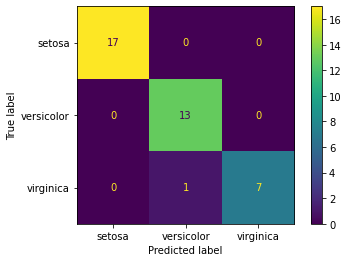

In [29]:
# criar o modelo
logmodel = LogisticRegression()

# treino
logmodel.fit(X_treino, y_treino)

# visualiza precisão
metrics.plot_confusion_matrix(logmodel, X_teste, y_teste)

In [30]:
17+13+7+1

38

In [31]:
X_teste.shape

(38, 4)

In [32]:
37/38

0.9736842105263158